## UCI ML Breast Cancer Classification

We attempt to understand the most accurate model that can learn from the given dataset and be able to predict well, any new input data to be either a "malignant" or "benign" example.

We'll be trying out various models spanning across LogReg, DTC, RFC, KNN and SVM.

### Importing Libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

### Loading the data

In [58]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 
         'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
         'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names).replace('?', np.nan).dropna()
df.drop(['id'], axis=1, inplace=True) #since, it won't contribute to classification.

In [59]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [60]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Preparing the data

In [61]:
dataset = df
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

So now, the data looks clean and usable with nulls and id removed. Let's see if there's any high/low correlations amongst features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16e13e090>,
      dtype=object)

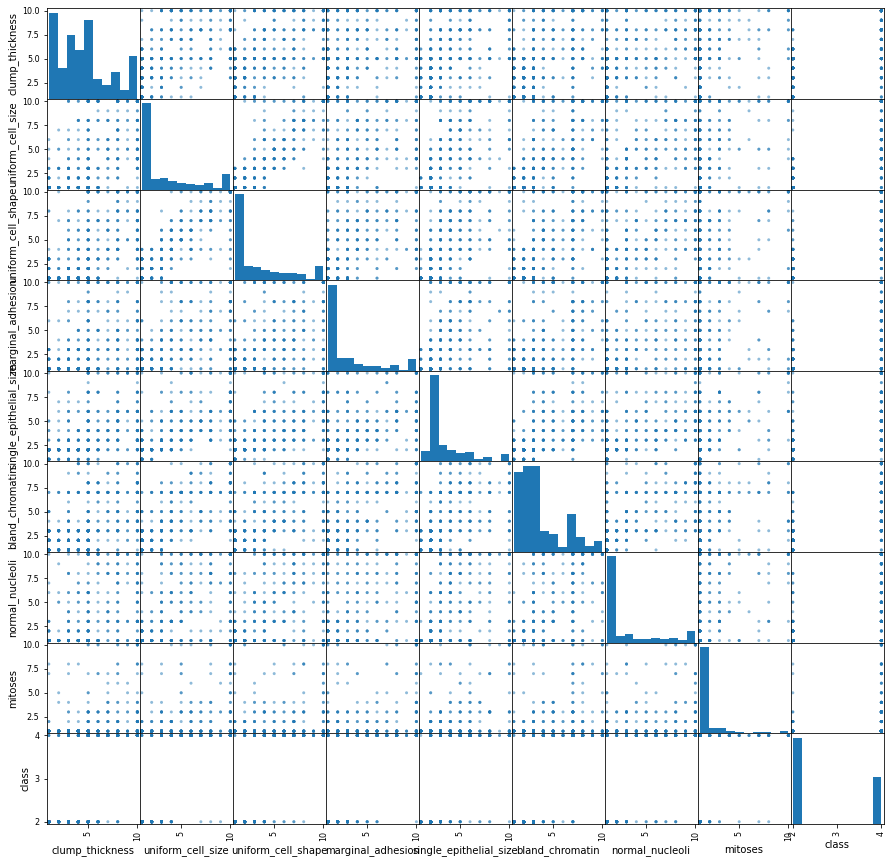

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 15))

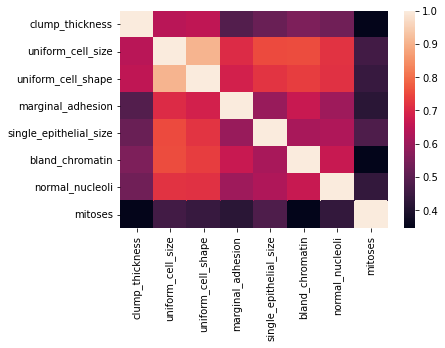

In [63]:
df.drop(['class'], axis=1, inplace=True)
import seaborn as sb
  
# plotting correlation heatmap
dataplot=sb.heatmap(df.corr())
  
# displaying heatmap
plt.show()

### Splitting the dataset into the Training set and Test set

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree Classification

### Training the Decision Tree Classification model on the Training set

In [66]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Making the Confusion Matrix

In [67]:

y1_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y1_pred)
print(cm)
accuracy_score(y_test, y1_pred)

[[104   3]
 [  4  60]]


0.9590643274853801

## KNN Classification

### Training the K-NN model on the Training set

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Confusion Matrix

In [69]:

y2_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y2_pred)
print(cm)
accuracy_score(y_test, y2_pred)

[[103   4]
 [  5  59]]


0.9473684210526315

## Kernel SVM Classifier

### Training the Kernel SVM 

In [70]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

### Making the Confusion Matrix

In [71]:

y3_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y3_pred)
print(cm)
accuracy_score(y_test, y3_pred)

[[101   6]
 [  3  61]]


0.9473684210526315

## Logistic Regression

### Training the model

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Results

In [73]:

y4_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y4_pred)
print(cm)
accuracy_score(y_test, y4_pred)

[[103   4]
 [  5  59]]


0.9473684210526315

## Naive Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [75]:

y5_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y5_pred)
print(cm)
accuracy_score(y_test, y5_pred)

[[99  8]
 [ 2 62]]


0.9415204678362573

## Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [81]:

y6_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y6_pred)
print(cm)
accuracy_score(y_test, y6_pred)

[[104   3]
 [  5  59]]


0.9532163742690059

So, after evaluating all models, we can safely conclude that the Decision Tree Classifier performed the best on this dataset with ~96% accuracy provided and it was followed by Random Forest Classifier at 95.32% (maybe can do better if we go further optimize the hyperparameters) and Kernel SVM ties at 3rd place with KNN and LogReg at 94.7% accuracy. 